In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#
# load data and inspect
#
df = pd.read_csv('austin_weather.csv')
#
print(df.head())
print(df.tail())

         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches Visibili

In [3]:
df = df.loc[:, ['Date', 'TempAvgF']]
df.head()

,Date,TempAvgF
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


In [4]:
#
# add some useful columns
#
df.loc[:, 'Year'] = df.loc[:, 'Date'].str.slice(0, 4).astype('int')
df.loc[:, 'Month'] = df.loc[:, 'Date'].str.slice(5, 7).astype('int')
df.loc[:, 'Day'] = df.loc[:, 'Date'].str.slice(8, 10).astype('int')
#
print(df.head())
print(df.tail())

         Date  TempAvgF  Year  Month  Day
0  2013-12-21        60  2013     12   21
1  2013-12-22        48  2013     12   22
2  2013-12-23        45  2013     12   23
3  2013-12-24        46  2013     12   24
4  2013-12-25        50  2013     12   25
            Date  TempAvgF  Year  Month  Day
1314  2017-07-27        89  2017      7   27
1315  2017-07-28        91  2017      7   28
1316  2017-07-29        92  2017      7   29
1317  2017-07-30        93  2017      7   30
1318  2017-07-31        88  2017      7   31


In [5]:
#
# set a 20 day window then use that to smooth 
# temperature in a new column
window = 20
df['20_d_mov_avg'] = df.TempAvgF.rolling(window).mean()
print(df.head())
print(df.tail())

         Date  TempAvgF  Year  Month  Day  20_d_mov_avg
0  2013-12-21        60  2013     12   21           NaN
1  2013-12-22        48  2013     12   22           NaN
2  2013-12-23        45  2013     12   23           NaN
3  2013-12-24        46  2013     12   24           NaN
4  2013-12-25        50  2013     12   25           NaN
            Date  TempAvgF  Year  Month  Day  20_d_mov_avg
1314  2017-07-27        89  2017      7   27         88.95
1315  2017-07-28        91  2017      7   28         89.10
1316  2017-07-29        92  2017      7   29         89.25
1317  2017-07-30        93  2017      7   30         89.50
1318  2017-07-31        88  2017      7   31         89.45


In [6]:
#
# now let's slice exactly one year on the
# calendar start and end dates
# we see from the previous output that 
# 2014 is the first year with complete data, 
# however it will still have NaN values for 
# the moving average, so we'll use 2015
#
df_one_year = df.loc[df.Year == 2015, :].reset_index()
df_one_year['Day_of_Year'] = df_one_year.index + 1
print(df_one_year.head())
print(df_one_year.tail())

   index        Date  TempAvgF  Year  Month  Day  20_d_mov_avg  Day_of_Year
0    376  2015-01-01        37  2015      1    1         52.70            1
1    377  2015-01-02        41  2015      1    2         51.50            2
2    378  2015-01-03        51  2015      1    3         50.65            3
3    379  2015-01-04        43  2015      1    4         49.65            4
4    380  2015-01-05        41  2015      1    5         48.95            5
     index        Date  TempAvgF  Year  Month  Day  20_d_mov_avg  Day_of_Year
360    736  2015-12-27        55  2015     12   27         61.10          361
361    737  2015-12-28        41  2015     12   28         60.20          362
362    738  2015-12-29        43  2015     12   29         59.25          363
363    739  2015-12-30        49  2015     12   30         58.45          364
364    740  2015-12-31        46  2015     12   31         57.45          365


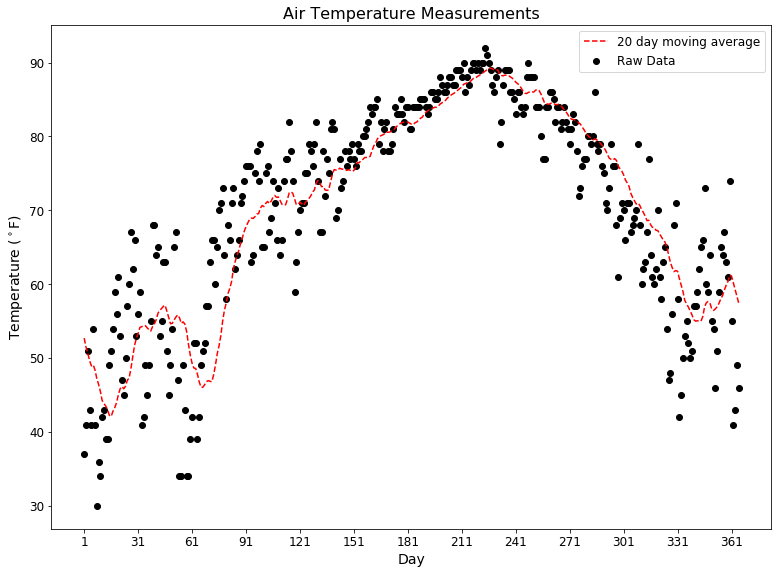

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
#
# Moving averages
#
ax.plot(df_one_year.Day_of_Year,
        df_one_year['20_d_mov_avg'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)

In [8]:
#
# fit a linear model
#
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_one_year['Day_of_Year'].values.reshape((-1, 1)),
                 df_one_year.TempAvgF)
print('model slope: ', linear_model.coef_)
print('model intercept: ', linear_model.intercept_)
print('model r squared: ', 
      linear_model.score(df_one_year['Day_of_Year'].values.reshape((-1, 1)),
                         df_one_year.TempAvgF))

model slope:  [0.04304568]
model intercept:  62.23496914044859
model r squared:  0.09549593659736466


In [9]:
#
# make predictions using the training data
#
y_pred = linear_model.predict(df_one_year['Day_of_Year'].values.
                              reshape((-1, 1)))
x_pred = df_one_year.Day_of_Year

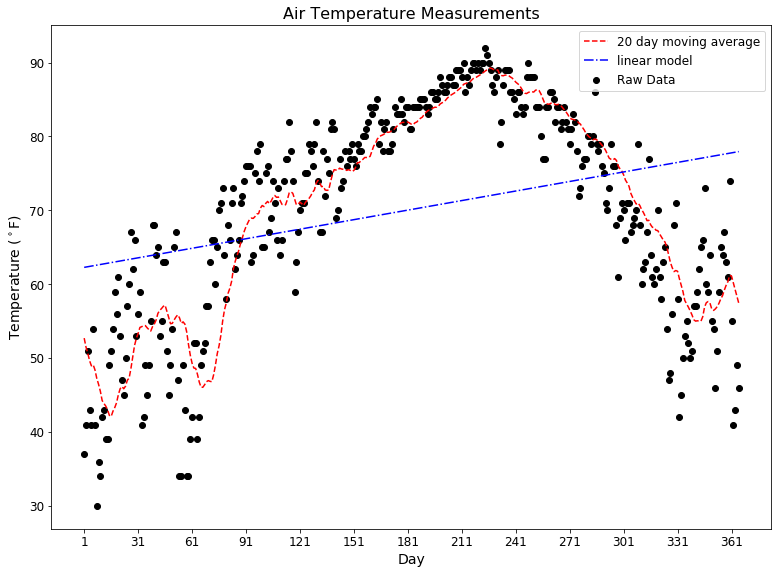

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
#
# Moving averages
#
ax.plot(df_one_year.Day_of_Year,
        df_one_year['20_d_mov_avg'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
#
# linear model
#
ax.plot(x_pred, y_pred,
        c = "blue",
        linestyle = '-.',
        label = 'linear model')
#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)